In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import os, sys

 
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.vehicle_type_model import VehicleTypeModel

In [2]:
import pyrosm

osm = pyrosm.OSM("../data/land_use/037006_Bologna-2025-03-12T13Z.osm.pbf")
landuse_gdf = osm.get_landuse()
landuse_gdf = landuse_gdf.to_crs("EPSG:32632")



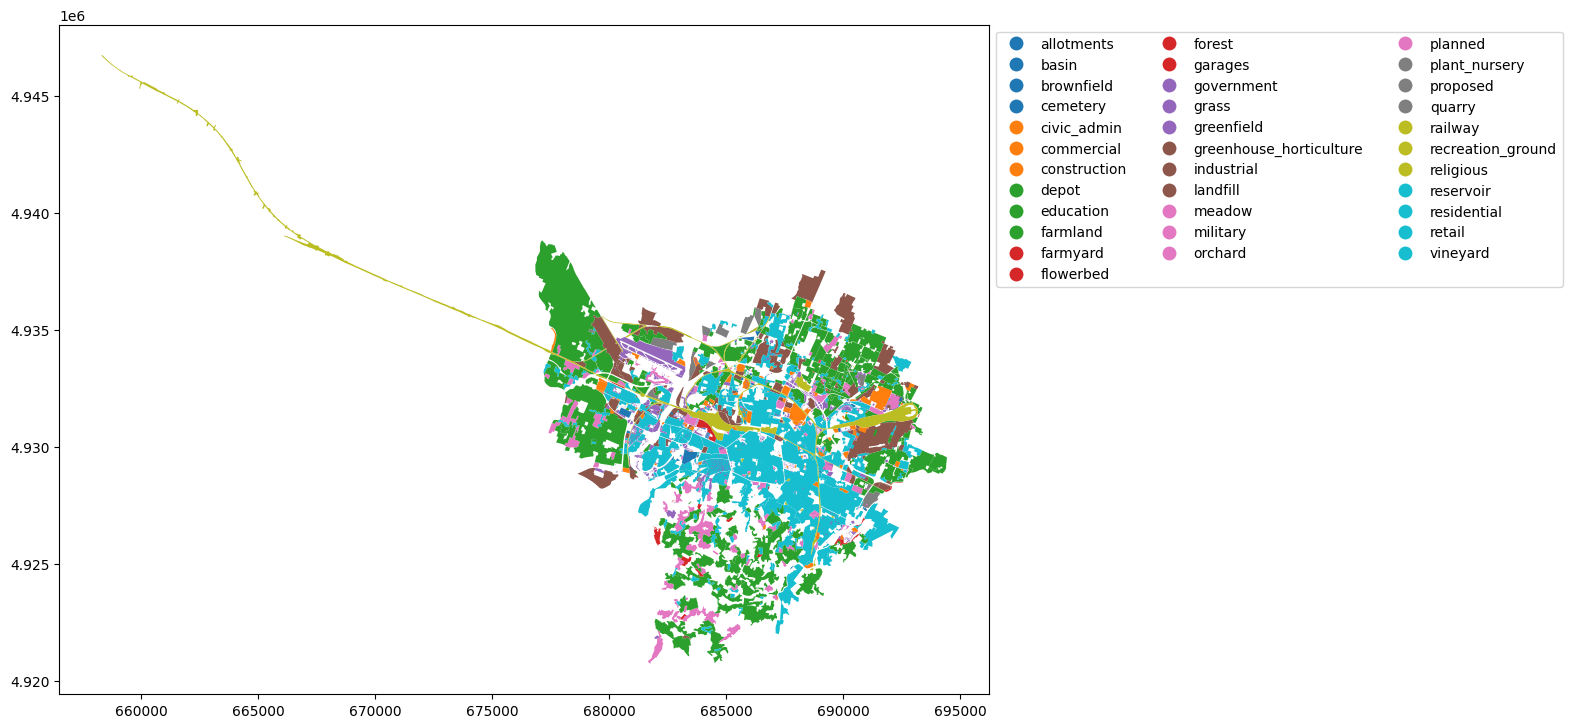

In [3]:

import matplotlib.pyplot as plt
ax = landuse_gdf.plot(column="landuse", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))
plt.show()

In [4]:
vm = VehicleTypeModel(
    traffic_csv="../data/bologna_traffic_time_series.csv",
    meta_csv="../data/bologna_traffic_metadata.csv",
    ltz_shp="../data/ltz_zones/zona-a-traffico-limitato.shp",
    nrows=5000  # Limit to 5000 rows for performance
)
vm.landuse_gdf = landuse_gdf  
vm.run_full_pipeline()

Validation passed!
Processing complete!


In [5]:
vm.results

,datetime,id_uni,Level,VAN_count,BOX_TRUCK_count,TRUCK_count,proportion_VAN,proportion_BOX_TRUCK,proportion_TRUCK
0,2024-04-24,450,1,37,8,4,0.760000,0.160000,0.080000
1,2024-04-24,362,1,74,16,8,0.760000,0.160000,0.080000
2,2024-04-24,753,1,172,36,18,0.760000,0.160000,0.080000
3,2024-04-24,456,1,0,0,0,0.760000,0.160000,0.080000
4,2024-04-24,323,1,160,34,17,0.760000,0.160000,0.080000
...,...,...,...,...,...,...,...,...,...
49995,2024-07-30,130,1,44,9,5,0.760000,0.160000,0.080000
49996,2024-08-01,227,1,14,3,2,0.730769,0.176923,0.092308
49997,2024-07-30,110,1,194,41,20,0.760000,0.160000,0.080000
49998,2024-08-01,229,1,136,33,17,0.730769,0.176923,0.092308
